# DECISION TREE

The Decision Tree model is a supervised machine learning algorithm where data is continously split based on a certain parameter. The model acts as a classifier(tree structured classifier) and it can be used for both classification and regression tasks. 

Decision trees have two types of nodes: decision nodes and leaf nodes. The decision node is reponsible for classifying the unlabeled/unknown inputs given to the model. The leaf nodes are classes/the final outcomes.

An example of a decision tree can be explained using the following binary tree. Let’s say you want to predict whether a person would accept or decline a job offer. The decision nodes will classify based on conditions like 'What’s the salary range?', 'Is the office near me?', 'Is a cab facility available?' And leaf nodes, which are outcomes: 'Accepted offer' or 'Declined offer'. 

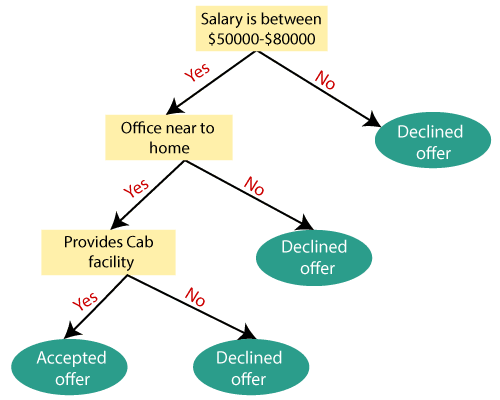

Dataset Description:

 - Duration – Duration of trip
 - Start Date – Includes start date and time
 - End Date – Includes end date and time
 - Start Station – Includes starting station name and number
 - End Station – Includes ending station name and number
 - Bike Number – Includes ID number of bike used for the trip
 - Member Type – Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)

The following Decision Tree model is used for binary classification, some data from each record is used for classification as 'member' or 'casual' for that particular record.

In [ ]:
## importing required libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
## importing the dataset

data_set = pd.read_csv('C:/Users/admin/Desktop/201805-capitalbikeshare-tripdata.csv')

In [ ]:
## printing data set summary

print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374115 entries, 0 to 374114
Data columns (total 9 columns):
Duration                374115 non-null int64
Start date              374115 non-null object
End date                374115 non-null object
Start station number    374115 non-null int64
Start station           374115 non-null object
End station number      374115 non-null int64
End station             374115 non-null object
Bike number             374115 non-null object
Member type             374115 non-null object
dtypes: int64(3), object(6)
memory usage: 25.7+ MB
None


In [ ]:
## separation of features, class label

X = data_set.iloc[:, [0, 3, 5]].values

y = data_set.iloc[:, -1].values

print(X[:5])

print(y[:5])


[[  679 31302 31307]
 [  578 31232 31609]
 [  580 31232 31609]
 [  606 31104 31509]
 [  582 31129 31118]]
['Member' 'Casual' 'Casual' 'Member' 'Member']


In [ ]:
## encoding categorical data

from sklearn.preprocessing import LabelEncoder

labelencoder_y =LabelEncoder()

y = labelencoder_y.fit_transform(y)

print("Sample y:",y[:5])

print("0 :",labelencoder_y.classes_[0])

print("1 :",labelencoder_y.classes_[1])

Sample y: [1 0 0 1 1]
0 : Casual
1 : Member


In [ ]:
## splitting the data into training & testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
## classifier: Decision Tree

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=0)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [ ]:
## predicting the test set results

y_pred = classifier.predict(X_test)


In [ ]:
## confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[16396  8901]
 [10599 57633]]
